In [2]:
# Import necessary libraries 

import pymysql
from sqlalchemy import create_engine
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np 

# The bank wants to understand the demographics and other characteristics of its customers that accept a credit card offer and that do not accept a credit card.

In [3]:
data = data = pd.read_csv('/Users/Lenovo/Desktop/creditcardmarketing.csv', header=None)

In [4]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
1,2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
2,3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
3,4,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
4,5,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0


In [5]:
data.columns = ['Customer Number', 'Offer Accepted', 'Reward', 'Mailer Type', 'Income Level', 'Bank Accounts Open', 'Overdraft Protection', 'Credit Rating', 'Credit Cards Held', 'Homes Owned', 'Household Size', 'Own Your Home', 'Average Balance', 'Q1 Balance', 'Q2 Balance', 'Q3 Balance', 'Q4 Balance']


In [6]:
data.head()

,Customer Number,Offer Accepted,Reward,Mailer Type,Income Level,Bank Accounts Open,Overdraft Protection,Credit Rating,Credit Cards Held,Homes Owned,Household Size,Own Your Home,Average Balance,Q1 Balance,Q2 Balance,Q3 Balance,Q4 Balance
0,1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
1,2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
2,3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
3,4,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
4,5,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0


In [7]:
data.columns=[e.lower().replace(' ', '_') for e in data.columns]   # lower and replace
data.columns

Index(['customer_number', 'offer_accepted', 'reward', 'mailer_type',
       'income_level', 'bank_accounts_open', 'overdraft_protection',
       'credit_rating', 'credit_cards_held', 'homes_owned', 'household_size',
       'own_your_home', 'average_balance', 'q1_balance', 'q2_balance',
       'q3_balance', 'q4_balance'],
      dtype='object')

### Deal with NaNs

In [8]:
data.info(memory_usage='deep')   # dataframe info


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18000 entries, 0 to 17999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   customer_number       18000 non-null  int64  
 1   offer_accepted        18000 non-null  object 
 2   reward                18000 non-null  object 
 3   mailer_type           18000 non-null  object 
 4   income_level          18000 non-null  object 
 5   bank_accounts_open    18000 non-null  int64  
 6   overdraft_protection  18000 non-null  object 
 7   credit_rating         18000 non-null  object 
 8   credit_cards_held     18000 non-null  int64  
 9   homes_owned           18000 non-null  int64  
 10  household_size        18000 non-null  int64  
 11  own_your_home         18000 non-null  object 
 12  average_balance       17976 non-null  float64
 13  q1_balance            17976 non-null  float64
 14  q2_balance            17976 non-null  float64
 15  q3_balance         

In [9]:
data.isna().sum()     # missing values


customer_number          0
offer_accepted           0
reward                   0
mailer_type              0
income_level             0
bank_accounts_open       0
overdraft_protection     0
credit_rating            0
credit_cards_held        0
homes_owned              0
household_size           0
own_your_home            0
average_balance         24
q1_balance              24
q2_balance              24
q3_balance              24
q4_balance              24
dtype: int64

In [10]:
data=data.dropna()   # drop rows with nan values


In [11]:
data.isna().sum() 

customer_number         0
offer_accepted          0
reward                  0
mailer_type             0
income_level            0
bank_accounts_open      0
overdraft_protection    0
credit_rating           0
credit_cards_held       0
homes_owned             0
household_size          0
own_your_home           0
average_balance         0
q1_balance              0
q2_balance              0
q3_balance              0
q4_balance              0
dtype: int64

In [12]:
# the unique customer number doesn't provide relevant info for our prediction
data=data.drop(columns=['customer_number'])

In [13]:
for c in data.columns.tolist():         # know the number of unique values for each column
    print(c, len(data[c].unique()))

offer_accepted 2
reward 3
mailer_type 2
income_level 3
bank_accounts_open 3
overdraft_protection 2
credit_rating 3
credit_cards_held 4
homes_owned 3
household_size 8
own_your_home 2
average_balance 4728
q1_balance 2158
q2_balance 1945
q3_balance 2281
q4_balance 2184


In [14]:
data.describe

<bound method NDFrame.describe of       offer_accepted     reward mailer_type income_level  bank_accounts_open  \
0                 No  Air Miles      Letter         High                   1   
1                 No  Air Miles      Letter       Medium                   1   
2                 No  Air Miles    Postcard         High                   2   
3                 No  Air Miles      Letter       Medium                   2   
4                 No  Air Miles      Letter       Medium                   1   
...              ...        ...         ...          ...                 ...   
17995             No  Cash Back      Letter         High                   1   
17996             No  Cash Back      Letter         High                   1   
17997             No  Cash Back      Letter         High                   1   
17998             No  Cash Back      Letter       Medium                   1   
17999             No  Cash Back      Letter          Low                   2   

     

In [15]:
data.describe()

,bank_accounts_open,credit_cards_held,homes_owned,household_size,average_balance,q1_balance,q2_balance,q3_balance,q4_balance
count,17976.000000,17976.000000,17976.000000,17976.000000,17976.000000,17976.000000,17976.000000,17976.000000,17976.000000
mean,1.255730,1.903427,1.203549,3.499110,940.515562,910.450656,999.392190,1042.033600,810.185803
std,0.472405,0.797086,0.427446,1.114476,350.297837,620.077060,457.402268,553.452599,559.001365
min,1.000000,1.000000,1.000000,1.000000,48.250000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,3.000000,787.500000,392.750000,663.000000,633.000000,363.000000
50%,1.000000,2.000000,1.000000,3.000000,1007.000000,772.000000,1032.000000,945.500000,703.000000
75%,1.000000,2.000000,1.000000,4.000000,1153.250000,1521.000000,1342.000000,1463.000000,1212.000000
max,3.000000,4.000000,3.000000,9.000000,3366.250000,3450.000000,3421.000000,3823.000000,4215.000000


### EXPLORE DATA EDA 

In [16]:
#create a numerical df to explore the num data only 
numericals = data.select_dtypes(np.number)
numericals.head()

,bank_accounts_open,credit_cards_held,homes_owned,household_size,average_balance,q1_balance,q2_balance,q3_balance,q4_balance
0,1,2,1,4,1160.75,1669.0,877.0,1095.0,1002.0
1,1,2,2,5,147.25,39.0,106.0,78.0,366.0
2,2,2,1,2,276.50,367.0,352.0,145.0,242.0
3,2,1,1,4,1219.00,1578.0,1760.0,1119.0,419.0
4,1,2,1,6,1211.00,2140.0,1357.0,982.0,365.0


In [17]:
#from sklearn.preprocessing import Normalizer
#transformer = Normalizer().fit(numericals)
#x_normalized = transformer.transform(numericals)
#print(x_normalized.shape)

In [18]:
# numerical scaling 

from sklearn.preprocessing import MinMaxScaler


In [19]:
transformer = MinMaxScaler().fit(numericals)
x_mmscaled = transformer.transform(numericals)
print(x_mmscaled.shape)


(17976, 9)


In [20]:
x_mmscaled

array([[0.        , 0.33333333, 0.        , ..., 0.25635779, 0.28642427,
        0.23772242],
       [0.        , 0.33333333, 0.5       , ..., 0.03098509, 0.02040283,
        0.08683274],
       [0.5       , 0.33333333, 0.        , ..., 0.10289389, 0.03792833,
        0.057414  ],
       ...,
       [0.        , 0.33333333, 0.        , ..., 0.22420345, 0.30604238,
        0.3544484 ],
       [0.        , 1.        , 0.5       , ..., 0.28734288, 0.2262621 ,
        0.3831554 ],
       [0.5       , 0.33333333, 0.        , ..., 0.4028062 , 0.51739472,
        0.1430605 ]])

In [21]:
# Categorical 

In [22]:
categoricals = data.select_dtypes(np.object)# you can also use this to split the data before scaling / OHE
categoricals.head(20)

,offer_accepted,reward,mailer_type,income_level,overdraft_protection,credit_rating,own_your_home
0,No,Air Miles,Letter,High,No,High,No
1,No,Air Miles,Letter,Medium,No,Medium,Yes
2,No,Air Miles,Postcard,High,No,Medium,Yes
3,No,Air Miles,Letter,Medium,No,High,No
4,No,Air Miles,Letter,Medium,No,Medium,Yes
5,No,Air Miles,Letter,Medium,No,High,No
6,No,Air Miles,Letter,Medium,No,Medium,No
7,No,Cash Back,Postcard,Low,No,Medium,Yes
8,No,Air Miles,Postcard,Medium,No,Low,Yes
9,No,Air Miles,Letter,High,No,Low,Yes


In [23]:
categoricals=pd.get_dummies(categoricals, columns =['offer_accepted','reward', 'mailer_type','income_level','overdraft_protection', 'credit_rating', 'own_your_home' ], drop_first=True)
categoricals.head()
# could choose or not choose to drop first column 

,offer_accepted_Yes,reward_Cash Back,reward_Points,mailer_type_Postcard,income_level_Low,income_level_Medium,overdraft_protection_Yes,credit_rating_Low,credit_rating_Medium,own_your_home_Yes
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,1,1
2,0,0,0,1,0,0,0,0,1,1
3,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,1,1


In [24]:
y= categoricals['offer_accepted_Yes']
categoricals=categoricals.drop(['offer_accepted_Yes'], axis=1)
categoricals

,reward_Cash Back,reward_Points,mailer_type_Postcard,income_level_Low,income_level_Medium,overdraft_protection_Yes,credit_rating_Low,credit_rating_Medium,own_your_home_Yes
0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,1,1
2,0,0,1,0,0,0,0,1,1
3,0,0,0,0,1,0,0,0,0
4,0,0,0,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...
17995,1,0,0,0,0,0,1,0,1
17996,1,0,0,0,0,0,1,0,1
17997,1,0,0,0,0,0,1,0,0
17998,1,0,0,0,1,0,0,1,1


In [25]:
# Merge files
X = np.concatenate((x_mmscaled, categoricals),axis=1)

In [26]:
X

array([[0.        , 0.33333333, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.33333333, 0.5       , ..., 0.        , 1.        ,
        1.        ],
       [0.5       , 0.33333333, 0.        , ..., 0.        , 1.        ,
        1.        ],
       ...,
       [0.        , 0.33333333, 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.5       , ..., 0.        , 1.        ,
        1.        ],
       [0.5       , 0.33333333, 0.        , ..., 0.        , 1.        ,
        0.        ]])

In [27]:
### Train - Test Split 

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =train_test_split(X, y, test_size= 0.4, random_state=40)

In [30]:
## Apply Model

In [31]:
classification = LogisticRegression(random_state=0, solver='lbfgs',max_iter=300,
multi_class='ovr').fit(X_train, y_train)

In [32]:
## Evaluate Accuracy 

In [33]:
from sklearn.metrics import accuracy_score 
predictions = classification.predict(X_test)

In [34]:
predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [35]:
y_true=np.array

In [36]:
accuracy_score(y_test, predictions)

0.9411764705882353

In [37]:
### Evaluating the Model

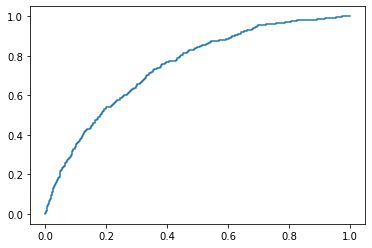

In [38]:
# ROC curve
from sklearn import metrics
import matplotlib.pyplot as plt

y_pred_proba = classification.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr)

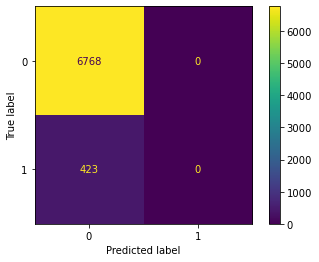

In [39]:
# The Confusion Matrix 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

accuracy_score(y_test, predictions)
confusion_matrix(y_test, predictions)
plot_confusion_matrix(classification, X_test, y_test)
plt.show()

In [40]:
## KNN Model 

In [41]:
from sklearn.neighbors import KNeighborsRegressor

knn_model = KNeighborsRegressor(n_neighbors=4) # The keyword "n_neighbors" is what sets the K.
knn_model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=4)

In [42]:
## Getting our predictions

In [43]:
knn_predictions = knn_model.predict(X_test)


In [44]:
### Getting the error metrics of our K-NN model

In [45]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

MAE = mean_absolute_error(y_test,knn_predictions)
MSE = mean_squared_error(y_test,knn_predictions)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_test,knn_predictions)

print("The mean absolute error of the model in the test set is: %6.2f" % (MAE))
print("The mean squared error of the model in the test set is: %6.2f" % (MSE))
print("The root mean squared error of the model in the test set is: %6.2f" % (RMSE))
print("The R2 of the model in the test set is: %4.2f" % (R2))

The mean absolute error of the model in the test set is:   0.10
The mean squared error of the model in the test set is:   0.07
The root mean squared error of the model in the test set is:   0.26
The R2 of the model in the test set is: -0.19


In [46]:
### data imbalanced - resolve 

In [47]:
y.value_counts()

0    16955
1     1021
Name: offer_accepted_Yes, dtype: int64

In [48]:
#pip install imblearn 

In [49]:
# pip install delayed

In [50]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [51]:
X_sm, y_sm = smote.fit_resample(X, y)
y_sm.value_counts()

1    16955
0    16955
Name: offer_accepted_Yes, dtype: int64

In [52]:
#re do train test split It2

X_train, X_test, y_train, y_test =train_test_split(X_sm, y_sm, test_size= 0.4, random_state=40)

In [53]:
# apply model It2 
classification = LogisticRegression(random_state=0, solver='lbfgs',max_iter=400,
multi_class='ovr').fit(X_train, y_train)

In [54]:
#accuracy assessment It2
predictions = classification.predict(X_test)
accuracy_score(y_test, predictions)

0.6979504570923032

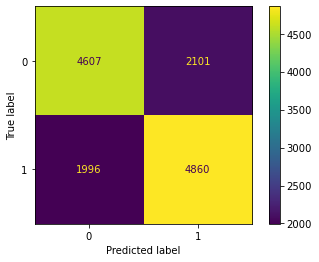

In [55]:
#Conf matrix It2 
confusion_matrix(y_test,predictions)
plot_confusion_matrix(classification, X_test, y_test)
plt.show()